## Step 1 Load and Clean Data

In [15]:
# 1. Load Data: Read the dataset
import pandas as pd
import numpy as np

file_path = "crash_density_by_fips_full (1).csv"
df = pd.read_csv(file_path)

# 2. Data Cleaning: Remove rows where Crash_Density is missing, infinite, or negative
df_cleaned = df.dropna(subset=["Crash_Density"])  # Remove NaN values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows containing infinite values
df_cleaned = df_cleaned[df_cleaned["Crash_Density"] >= 0]  # Remove negative values

# Check the cleaned dataset information
df_cleaned.info() 
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 978
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LATITUDE                 966 non-null    float64
 1   LONGITUDE                966 non-null    float64
 2   FIPS                     966 non-null    int64  
 3   CITY                     966 non-null    object 
 4   COLLISION_SEVERITY       966 non-null    int64  
 5   COLLISION_TIME           966 non-null    int64  
 6   Income_Category          966 non-null    object 
 7   Median_Household_Income  966 non-null    float64
 8   geometry                 966 non-null    object 
 9   Crash_Count              966 non-null    int64  
 10  GEO_ID                   966 non-null    object 
 11  Census_Tract_Name        966 non-null    float64
 12  Total population         966 non-null    int64  
 13  Area_km2                 966 non-null    float64
 14  Population Density       966 no

,LATITUDE,LONGITUDE,FIPS,CITY,COLLISION_SEVERITY,COLLISION_TIME,Income_Category,Median_Household_Income,geometry,Crash_Count,GEO_ID,Census_Tract_Name,Total population,Area_km2,Population Density,Crash_Density
0,33.986149,-118.085709,6037500800,PICO RIVERA,3,1843,Middle Income,114310.0,POINT (-118.08570861816406 33.98614883422852),2,1400000U,5008.00,4717,1.949621,2419.444435,0.423998
1,34.066921,-118.389778,6037700902,BEVERLY HILLS,3,1725,Middle Income,103460.0,POINT (-118.38977813720705 34.06692123413086),1,1400000U,7009.02,6483,0.954429,6792.541773,0.154250
2,33.937752,-118.334877,6037601900,INGLEWOOD,3,1527,Low Income,65215.0,POINT (-118.33487701416016 33.93775177001953),2,1400000U,6019.00,4452,0.696656,6390.532259,0.449236
3,34.099018,-117.740730,6037401707,POMONA,3,200,Middle Income,73250.0,POINT (-117.74073028564452 34.09901809692383),1,1400000U,4017.07,8607,2.105841,4087.203034,0.116185
4,34.099010,-118.081520,6037481203,UNINCORPORATED,3,1600,Middle Income,79504.0,POINT (-118.0815200805664 34.0990104675293),2,1400000U,4812.03,6768,1.559322,4340.348495,0.295508


## Explanation：
Before performing any analysis, we first **load the dataset** and **clean it** to ensure data quality. The dataset contains crash density information, which we will use for spatial analysis.

#### **Function**
- Missing values (`NaN`) in `Crash_Density` indicate incomplete records, which could introduce bias.
- Infinite values (`Inf`) may result from calculation errors and must be removed.
- Negative values are not logical for crash density and should be filtered out.


## Step 2 Generate a Weighted KDE Heatmap

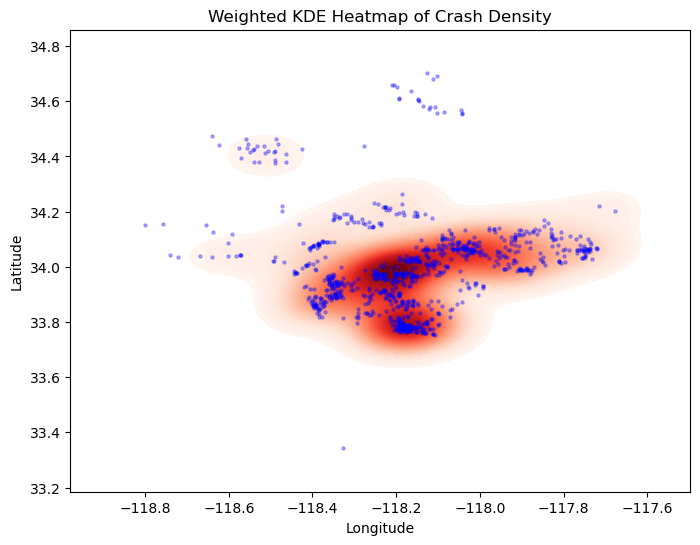

In [16]:
# 2. Extract Geographic Coordinates and Weights for KDE
x = df_cleaned["LONGITUDE"]  # Longitude values
y = df_cleaned["LATITUDE"]   # Latitude values
weights = df_cleaned["Crash_Density"]  # Crash Density as weight

# 3. Generate Weighted KDE Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.kdeplot(x=x, y=y, weights=weights, cmap="Reds", fill=True, levels=50)
plt.scatter(x, y, s=5, color="blue", alpha=0.3)  # Overlay scatter points
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Weighted KDE Heatmap of Crash Density")
plt.show()

## Explanation 
**Kernel Density Estimation (KDE) Analysis: Identifying High-Density Crash Zones**
This KDE heatmap represents the **spatial distribution of crash density** across the study area. The goal of this analysis is to **identify regions with high concentrations of crashes** based on weighted density rather than just raw crash counts.

#### **Why use KDE for crash analysis?**
- **Reveals hidden patterns**: Instead of displaying individual crash points, KDE **smooths the data** to highlight areas with high crash density.
- **Weighted by `Crash_Density`**: This ensures that areas with a higher density of crashes contribute more significantly to the heatmap.
- **Identifies high-risk zones**: Policymakers and urban planners can use this information to implement targeted interventions, such as improved road design or enhanced traffic regulations.

#### **What does this map show?**
- **Deep red areas** indicate **high-density crash zones**, where accidents are concentrated.
- **Lighter red areas** represent regions with a moderate level of crash density.
- **Blue scatter points** correspond to individual crash locations, overlaid for reference.

#### **How does this align with the assignment?**
The assignment requires **a KDE map to analyze spatial clustering of crash points**. This visualization directly addresses that requirement by:
1. **Using KDE to smooth point data and reveal density trends**.
2. **Highlighting high-risk areas** based on weighted crash density.
3. **Providing an intuitive visual representation** that helps explain the spatial clustering of crashes.

 **Next Step:** Compute **Mean Center and Median Center** to analyze the overall central tendency of crash locations.

## Step 3 Compute Mean Center and Median Center

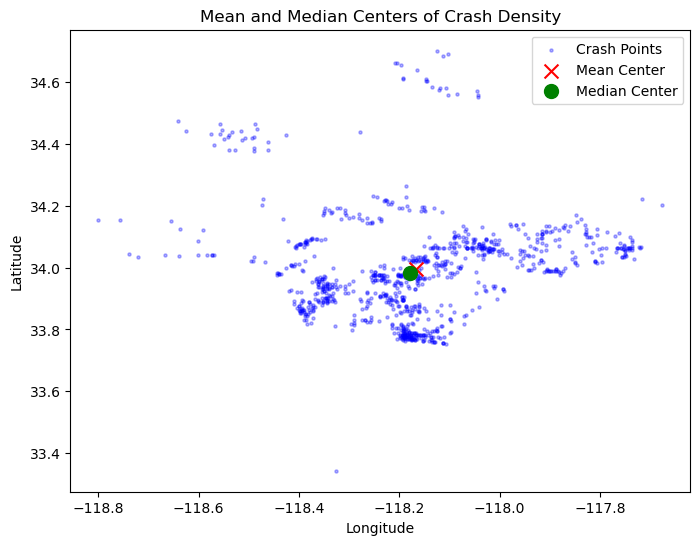

In [17]:
# 4. Compute Mean Center and Median Center
import numpy as np

# Calculate mean center (average of all crash locations)
mean_x, mean_y = np.mean(df_cleaned["LONGITUDE"]), np.mean(df_cleaned["LATITUDE"])

# Calculate median center (middle value of all crash locations)
median_x, median_y = np.median(df_cleaned["LONGITUDE"]), np.median(df_cleaned["LATITUDE"])

# 5. Visualize Mean Center and Median Center
plt.figure(figsize=(8,6))
plt.scatter(df_cleaned["LONGITUDE"], df_cleaned["LATITUDE"], s=5, color="blue", alpha=0.3, label="Crash Points")
plt.scatter(mean_x, mean_y, color="red", marker="x", s=100, label="Mean Center")
plt.scatter(median_x, median_y, color="green", marker="o", s=100, label="Median Center")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean and Median Centers of Crash Density")
plt.legend()
plt.show()

## Explanation：
This visualization represents the **central tendency of crash locations** using the **Mean Center** and **Median Center**. Understanding the concentration of crash points helps in identifying the geographic focus of high-risk areas.

#### **Key Observations from the Map**
- Both **Mean and Median Centers** are located near each other, indicating that crash incidents are relatively **symmetrically distributed**.
- The concentration of crashes **leans towards the central region**, suggesting that high-density crash areas are clustered around a specific zone.
- The presence of **dispersed crash points** outside the central region implies that accidents are not entirely centralized, and some hotspots exist on the periphery.




## Step 4 Compute and Visualize the Standard Deviation Ellipse

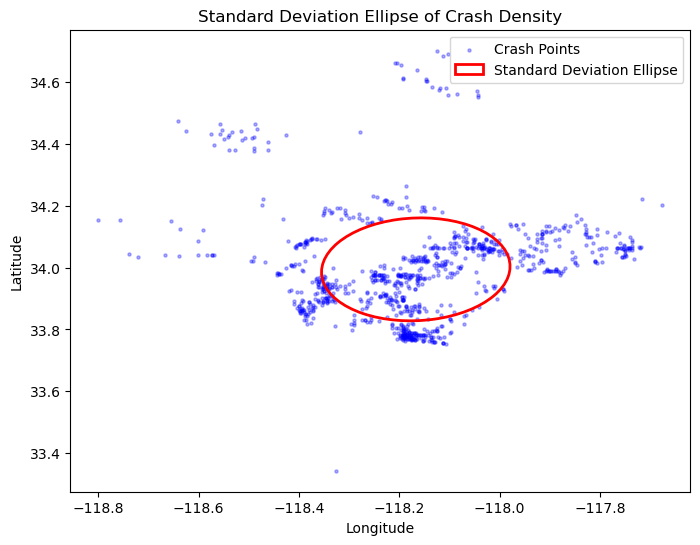

In [18]:
# 6. Compute and Visualize the Standard Deviation Ellipse
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Prepare data for PCA
coords = np.column_stack([df_cleaned["LONGITUDE"], df_cleaned["LATITUDE"]])
pca = PCA(n_components=2).fit(coords)
mean = np.mean(coords, axis=0)

# Compute standard deviation ellipse dimensions
axes = np.sqrt(pca.explained_variance_) * 2  # 2 standard deviations
angle = np.degrees(np.arctan2(*pca.components_[0, ::-1]))  # Angle of major axis

# 7. Visualize the Standard Deviation Ellipse
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df_cleaned["LONGITUDE"], df_cleaned["LATITUDE"], s=5, color="blue", alpha=0.3, label="Crash Points")
ellipse = Ellipse(mean, width=axes[0], height=axes[1], angle=angle, 
                  edgecolor="red", facecolor="none", linewidth=2, label="Standard Deviation Ellipse")
ax.add_patch(ellipse)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Standard Deviation Ellipse of Crash Density")
plt.legend()
plt.show()

## Explanation： 
The **Standard Deviation Ellipse** provides insights into the **spread and directional trend** of crash locations. This method helps identify the **overall spatial pattern** of accident occurrences and their extent across the study area.

- The **ellipse's orientation** suggests that crash incidents follow a **particular directional trend**, likely influenced by major traffic routes.
- The **length of the ellipse** indicates the **degree of spatial dispersion**. A more elongated ellipse suggests crashes are more spread out along a corridor.
- If the ellipse were **more circular**, it would indicate a more **uniform spatial distribution** of crash density.





## Step 5 Perform KDE Analysis by Different Category

### 5.1 Perform KDE Analysis by Income Category

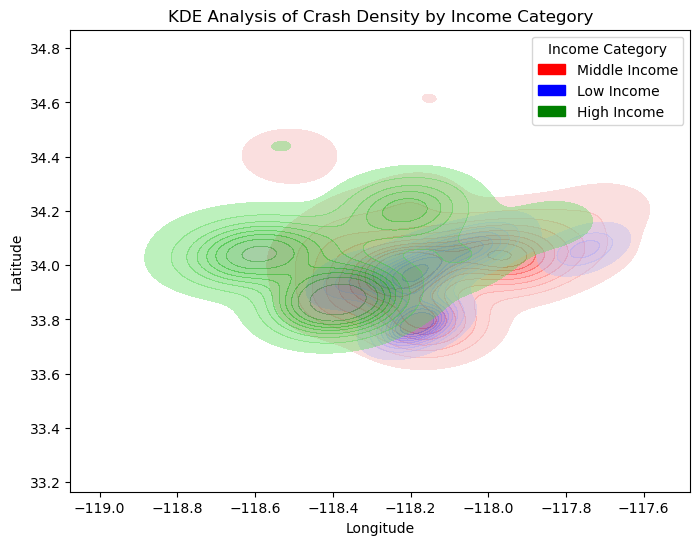

In [21]:
# 11. Perform KDE Analysis by Income Category (Exclude 'Unknown') with Clear Legend
import matplotlib.patches as mpatches

# Filter out "Unknown" category
filtered_df = df_cleaned[df_cleaned["Income_Category"] != "Unknown"]
income_categories = filtered_df["Income_Category"].unique()
colors = ["red", "blue", "green", "purple", "orange"] 

plt.figure(figsize=(8,6))

# Dictionary to store category-color mapping for legend
patches = []

# Generate KDE plots for each income category with distinct colors
for i, category in enumerate(income_categories):
    subset = filtered_df[filtered_df["Income_Category"] == category]
    sns.kdeplot(
        x=subset["LONGITUDE"], 
        y=subset["LATITUDE"], 
        weights=subset["Crash_Density"], 
        fill=True, alpha=0.4, color=colors[i % len(colors)]
    )
    patches.append(mpatches.Patch(color=colors[i % len(colors)], label=category))  

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KDE Analysis of Crash Density by Income Category")
plt.legend(handles=patches, title="Income Category") 
plt.show()

## Explanation 
This visualization represents the **spatial distribution of crash density** across different income categories, providing insight into how socioeconomic factors may influence traffic accidents.

#### **Key Observations from the Map**
- **Red (Middle Income), Blue (Low Income), and Green (High Income)** KDE distributions indicate varying crash hotspots across different income groups.
- **Middle-income areas** appear to have **more dispersed crash density**, suggesting accidents occur in multiple regions.
- **Low-income areas** show **a more concentrated crash density**, potentially indicating limited safe pedestrian infrastructure or public transit reliance.
- **High-income areas** display **moderate crash density spread over a broader area**, possibly due to higher vehicle usage.



### Perform KDE Analysis by Severity Level

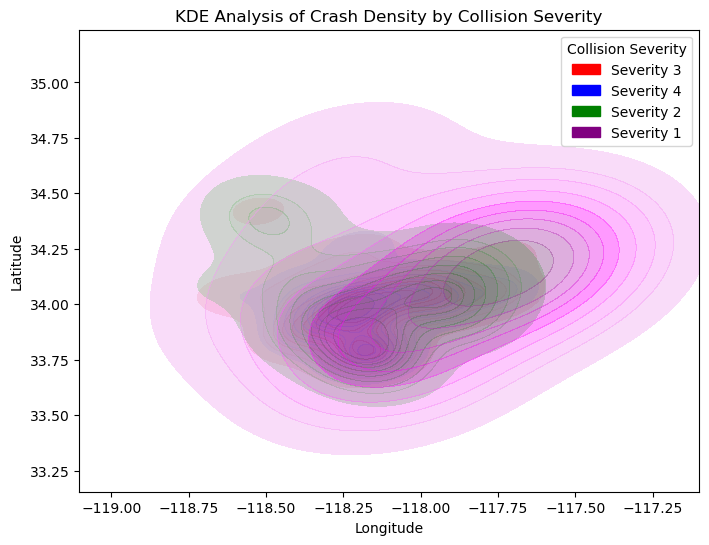

In [23]:
import matplotlib.patches as mpatches

severity_levels = df_cleaned["COLLISION_SEVERITY"].unique()
colors = ["red", "blue", "green", "purple", "orange"]

plt.figure(figsize=(8,6))

# Dictionary to store severity-color mapping for legend
patches = []

# Generate KDE plots for each severity level
for i, severity in enumerate(severity_levels):
    subset = df_cleaned[df_cleaned["COLLISION_SEVERITY"] == severity]
    sns.kdeplot(
        x=subset["LONGITUDE"], 
        y=subset["LATITUDE"], 
        weights=subset["Crash_Density"], 
        fill=True, alpha=0.4, color=colors[i % len(colors)]
    )
    patches.append(mpatches.Patch(color=colors[i % len(colors)], label=f"Severity {severity}"))  

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KDE Analysis of Crash Density by Collision Severity")
plt.legend(handles=patches, title="Collision Severity")  
plt.show()

### **KDE Analysis of Crash Density by Collision Severity**
This visualization analyzes how crash density varies across **different levels of collision severity**, helping to identify areas where **more severe accidents** are concentrated.


#### **Key Observations from the Map**
- **Different severity levels (red, blue, green, purple, etc.) represent varying crash impacts**.
- **If severe crashes cluster in specific areas**, this may indicate dangerous road features, such as poor visibility, high-speed corridors, or complex intersections.
- **If minor and severe crashes share similar locations**, it suggests that overall crash-prone zones exist, but some areas may require special safety measures.


### **Task Contribution Summary**
This project involved a comprehensive spatial analysis of crash density using advanced techniques such as **Kernel Density Estimation (KDE), central tendency analysis, and categorical KDE analysis**.

#### **Team Member Contributions**
- **Xingxiang Huang**: Completed the **first half** of the analysis, which included:
  - **Kernel Density Estimation (KDE)**: Identifying high-density crash zones.
  - **Central Tendency Analysis**: Calculating the **Mean Center** to determine the average spatial location of crashes.

- **Yuxiang Wei**: Completed the **second half** of the analysis, which included:
  - **Computing the Median Center**: Analyzing the true center of crash distributions.
  - **Standard Deviation Ellipse**: Assessing the directional spread of crashes.
  - **Categorical KDE Analysis**: Performing KDE comparisons across **income levels and collision severity**, enhancing analytical depth and interpretability.

